In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interactive
from scipy import signal

In [2]:
N = 200
x = np.linspace(0, 1, N, endpoint=False)
n = np.arange(N)
max_iter = N//20

In [3]:
def get_signal():
    scale = 8
    
    A1 = 2 / scale # 0.25
    A2 = 3 / scale # 0.375
    A3 = 4 / scale # 0.5
    
    f1 = 4
    f2 = 6
    f3 = 8
    
    phi1 = 0 * np.pi
    phi2 = 1/3 * np.pi
    phi3 = 4/3 * np.pi
    
    s1 = A1 * np.sin(2 * np.pi * f1 * x + phi1)
    s2 = A2 * np.sin(2 * np.pi * f2 * x + phi2)
    s3 = A3 * np.sin(2 * np.pi * f3 * x + phi3)
    mixed = s1 + s2 + s3

    return mixed
    

In [4]:
def plot_sin_cos_on_signal(k):
    mixed = get_signal()

    sinus = np.sin(2 * np.pi / N * k * n)
    cosinus = np.cos(2 * np.pi / N * k  * n)
    
    plt.plot(x, sinus, label="sinus", linestyle="--")
    plt.plot(x, cosinus, label="cosinus", linestyle="--")
    plt.plot(x, mixed, label="mixed", linewidth=2)
    
    plt.xlim(0, 1)
    plt.ylim(-1, 1)
    plt.legend(loc="lower left")
    plt.grid(True)
    
    plt.show()

In [5]:
interactive_sin_cos = interactive(plot_sin_cos_on_signal, k=(0, max_iter, 1))
output = interactive_sin_cos.children[-1]
output.layout.height = '450px'
interactive_sin_cos

interactive(children=(IntSlider(value=100, description='k', max=200), Output(layout=Layout(height='450px'))), …

In [6]:
def plot_sin_cos_mult(k):
    signal = get_signal()

    sinus = np.sin(2 * np.pi / N * k * n)
    cosinus = np.cos(2 * np.pi / N * k  * n)

    sinus_mult = signal * sinus
    cosinus_mult = signal * cosinus

    sin_sum = np.sum(sinus_mult)
    cos_sum = np.sum(cosinus_mult)

    sin_sum_avg = np.ones(N) * sin_sum / N
    cos_sum_avg = np.ones(N) * cos_sum / N

    plt.subplot(211)
    plt.plot(x, sinus_mult, label="sinus mult", linewidth=2)
    plt.plot(x, sin_sum_avg, label="sinus avg", linestyle="--", color="tab:red")
    plt.xlim(0, 1)
    plt.ylim(-1, 1)
    plt.legend(loc="lower left")
    plt.grid(True)

    plt.subplot(212)
    plt.plot(x, cosinus_mult, label="cosinus mult", linewidth=2, color="tab:orange")
    plt.plot(x, cos_sum_avg, label="cosinus avg", linestyle="--", color="tab:red")
    plt.xlim(0, 1)
    plt.ylim(-1, 1)
    plt.legend(loc="lower left")
    plt.grid(True)
    
    plt.show()

    print(f"Sinus sum: {sin_sum}")
    print(f"Cosinus sum: {cos_sum}")

In [7]:
interactive_mult = interactive(plot_sin_cos_mult, k=(0, max_iter, 1))
output = interactive_mult.children[-1]
output.layout.height = '500px'
interactive_mult

interactive(children=(IntSlider(value=100, description='k', max=200), Output(layout=Layout(height='500px'))), …

In [8]:
def get_sin_cos_coeffs(k):
    signal = get_signal()
    sin_coeffs = np.zeros(k)
    cos_coeffs = np.zeros(k)

    for i in range(k):
        sinus = np.sin(2 * np.pi / N * i * n)
        cosinus = np.cos(2 * np.pi / N * i  * n)
    
        sinus_mult = signal * sinus
        cosinus_mult = signal * cosinus
    
        sin_sum = np.sum(sinus_mult)
        cos_sum = np.sum(cosinus_mult)

        sin_coeffs[i] = sin_sum
        cos_coeffs[i] = cos_sum

    return sin_coeffs, cos_coeffs

sin_coeffs, cos_coeffs = get_sin_cos_coeffs(max_iter)
sin_coeffs_scaled = sin_coeffs / (N / 2)
cos_coeffs_scaled = cos_coeffs / (N / 2)

print(f"Max iter {max_iter}")
print(f"Sin coeffs {sin_coeffs}")
print(f"Cos coeffs {cos_coeffs}")

Max iter 200
Sin coeffs [ 0.00000000e+00 -4.99600361e-16  6.93889390e-16  2.60902411e-15
 -1.58945448e+01  3.33066907e-16  1.99840144e-15  7.21644966e-15
 -7.91581509e+00 -2.77555756e-15 -2.66453526e-15  5.49560397e-15
 -5.24218358e+00 -1.44328993e-15  0.00000000e+00  7.21644966e-15
 -3.89474285e+00 -1.66533454e-15  1.33226763e-15  4.44089210e-15
 -3.07768354e+00  1.99840144e-15  5.77315973e-15 -5.32907052e-15
 -2.52571169e+00  3.99680289e-15 -3.33066907e-15  7.27196081e-15
 -2.12510817e+00 -2.25375274e-14  8.88178420e-16 -3.94129174e-15
 -1.81899325e+00 -6.16173779e-15  1.29896094e-14  2.30371278e-15
 -1.57574786e+00  2.77555756e-16 -4.49640325e-15  9.54791801e-15
 -1.37638192e+00  3.71924713e-15  1.94289029e-15 -9.21485110e-15
 -1.20879235e+00 -3.16413562e-15  1.90958360e-14  4.44089210e-15
 -1.06489184e+00  7.82707232e-15  1.22124533e-15 -1.06026299e-14
 -9.39062506e-01  1.42108547e-14 -1.45439216e-14  6.38378239e-15
 -8.27271946e-01  1.49880108e-14  9.04831765e-15 -2.03725925e-14
 

In [9]:
def plot_reconstruct(k):
    k += 1
    mixed = np.zeros(N)
    signal = get_signal()
    
    for i in range(k):
        A_sin = sin_coeffs_scaled[i]
        A_cos = cos_coeffs_scaled[i]
        
        sinus = A_sin * np.sin(2 * np.pi / N * i * n)
        cosinus = A_cos * np.cos(2 * np.pi / N * i  * n)

        mixed += sinus + cosinus

    plt.plot(x, signal, label="original", linestyle="--", color="tab:green")
    plt.plot(x, mixed, label="mixed", linewidth=2)
    
    plt.xlim(0, 1)
    plt.ylim(-1, 1)
    plt.legend(loc="lower left")
    plt.grid(True)
    plt.show()

In [10]:
interactive_reconstruct = interactive(plot_reconstruct, k=(0, max_iter-1, 1))
output = interactive_reconstruct.children[-1]
output.layout.height = '450px'
interactive_reconstruct

interactive(children=(IntSlider(value=99, description='k', max=199), Output(layout=Layout(height='450px'))), _…

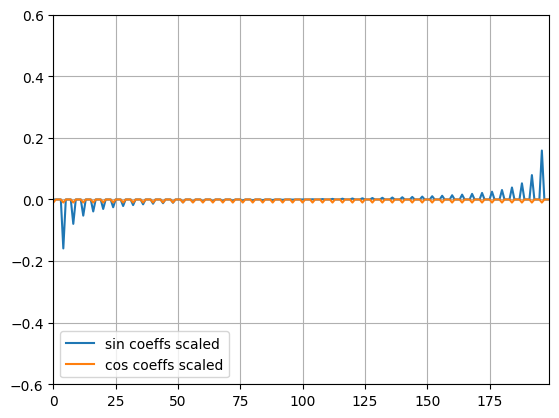

In [11]:
def plot_sin_cos_coeffs():
    # A1 = 2 / scale # 0.25
    # A2 = 3 / scale # 0.375
    # A3 = 4 / scale # 0.5

    # f1 = 4
    # f2 = 6
    # f3 = 8
    
    # phi1 = 0 * np.pi
    # phi2 = 1/3 * np.pi
    # phi3 = 4/3 * np.pi
    
    plt.plot(sin_coeffs_scaled, label="sin coeffs scaled")
    plt.plot(cos_coeffs_scaled, label="cos coeffs scaled")

    plt.xlim(0, max_iter-1)
    plt.ylim(-0.6, 0.6)
    plt.legend(loc="lower left")
    plt.grid(True)
    plt.show()

plot_sin_cos_coeffs()

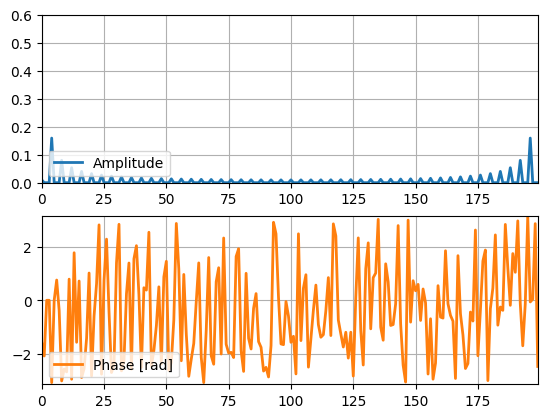

In [12]:
def plot_sin_cos_mixed():
    A_list = []
    phi_list = []
    
    # PROJECTION ON SINUS AND COSINUS WITH KNOWN FREQUENCY

    for i in range(max_iter):
        A_sin = sin_coeffs_scaled[i]
        A_cos = cos_coeffs_scaled[i]
        
        A = np.sqrt(A_sin**2 + A_cos**2)
        phi = np.arctan2(A_cos, A_sin)

        A_list.append(A)
        phi_list.append(phi)

    plt.subplot(211)
    plt.plot(A_list, label="Amplitude", linewidth=2)
    plt.xlim(0, max_iter-1)
    plt.ylim(0, 0.6)
    plt.legend(loc="lower left")
    plt.grid(True)

    plt.subplot(212)
    plt.plot(phi_list, label="Phase [rad]", linewidth=2, color="tab:orange")
    plt.xlim(0, max_iter-1)
    plt.ylim(-np.pi, np.pi)
    plt.legend(loc="lower left")
    plt.grid(True)
    
    plt.show()

# A1 = 2 / scale # 0.25
# A2 = 3 / scale # 0.375
# A3 = 4 / scale # 0.5

# f1 = 4
# f2 = 6
# f3 = 8

# phi1 = 0 * np.pi
# phi2 = 1/3 * np.pi
# phi3 = 4/3 * np.pi

plot_sin_cos_mixed()
        

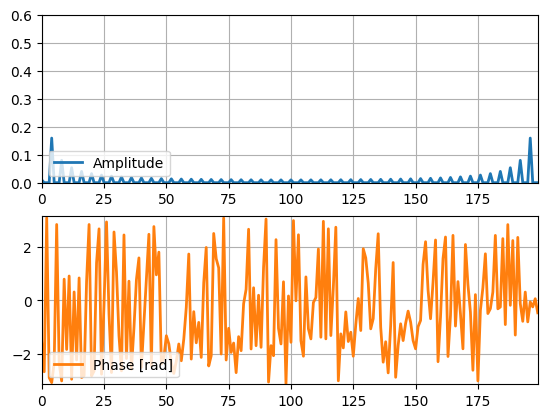

In [13]:
def plot_fft():
    signal = get_signal()
    fourier = np.fft.fft(signal)
    A = np.abs(fourier) / (N / 2)
    phase = np.angle(fourier)
    phase_corrected = phase + np.pi/2
    phase_corrected = (phase_corrected + np.pi) % (2*np.pi) - np.pi

    plt.subplot(211)
    plt.plot(A, label="Amplitude", linewidth=2)
    plt.xlim(0, max_iter-1)
    plt.ylim(0, 0.6)
    plt.legend(loc="lower left")
    plt.grid(True)

    plt.subplot(212)
    plt.plot(phase_corrected, label="Phase [rad]", linewidth=2, color="tab:orange")
    plt.xlim(0, max_iter-1)
    plt.ylim(-np.pi, np.pi)
    plt.legend(loc="lower left")
    plt.grid(True)
    
    plt.show()

plot_fft()